# Kristin Meier
# Hw 1

## Exercise 2 – Simple Grading System - memory based
In a given course the following:
- It has a number of students identified by a name and unique ID.
- Grades are based on:
    - 6 homework (10% each)
    - 2 projects (20% each)
- Final Grades based on final score (out of 100):
    - [90-100]:A ; [80-90): B ; [20-80): C ; [10-20): D ; [0-10): F
                                                       
Create a data structure (dict!) to store the class related information.
Provide the system user with a console based menu as follows:
- Add Student (id and name)
- Add Student Grades
- Print a list of student names, final scores, and letter grades sorted by names.
- Print score summary (Student Count, Min, Max, Avg. , StdDev)
- Plot a pie chart showing the final letter grades distribution.
- Exit the system
* Make your own assumptions but usability counts
* Functions and readability counts.
* Only core python built-in data types.

In [1]:
# import necessary libraries
from pylab import *
from collections import Counter
from operator import itemgetter
import numpy as np

### Helpful functions
- lettergrade: calculates student letter grade based on numeric final grade
- finalgrade: calculates student final grade based on homework and project grades
- initialize_dictionary: initializes the dictionary to be updated/used by teacher
    - initializes dictionary with 2 students

In [2]:
# final grade look up using function
def lettergrade(final_grade):
    if 90 <= final_grade <= 100:
        letter_grade = 'A'
    if 80 <= final_grade < 90:
        letter_grade = 'B'
    if 20 <= final_grade < 80:
        letter_grade = 'C'
    if 10 <= final_grade < 20:
        letter_grade = 'D'
    if 0 <= final_grade < 10:
        letter_grade = 'F'
    return letter_grade

# final grade calculation 
def finalgrade(hwgrades,projgrades):
    final_grade = sum([x*.1 for x in hwgrades] + [x*.2 for x in projgrades])
    return final_grade

# make the dictionary entries a list
def initialize_dictionary():
    class_dict = {'1': ['Kristin', [100,98,95,94,93,92], [90,90]],
                  '2': ['Ben', [50,98,95,70,93,92], [90,70]]}

    # calculating the final and letter grades by key
    for key in class_dict:
           class_dict[key] = class_dict[key] + [finalgrade(class_dict[key][1],class_dict[key][2])] + [lettergrade(finalgrade(class_dict[key][1],class_dict[key][2]))]

    return class_dict 

# initialize dictionary
class_dict = initialize_dictionary()

### Menu

- Inserted checks throughout
- Option to overwrite student's grades if already entered
- Will print score summary and show if students are missing from the calculation (i.e. no grades)
- Must enter homeworks and projects separted by a space. Must enter correct amount.
- Prints dictionary among exit

Helpful links (Additional links throughout menu code)
- (http://stackoverflow.com/questions/6797599/basic-python-def-function-and-recall-for-a-text-menu)
- (http://stackoverflow.com/questions/19964603/creating-a-menu-in-python)

In [3]:
# making the menu

def menu(class_dict):
    print("\nMenu:")
    print("     1. Add Student (id and name)")
    print("     2. Add Student Grades")
    print("     3. Print a list of student names, final scores, and letter grades sorted by names")
    print("     4. Print score summary (Student Count, Min, Max, Avg. , StdDev)")
    print("     5. Plot a pie chart showing the final letter grades distribution")
    print("     6. Exit")
    access = int(input("Make a selection from the above list: "))
    #return access 

    #access = menu()

    if access == 1:
        newid, newname = input("Enter Student id and name, separated by a space: ").split()
        # check: if key exists
        # http://stackoverflow.com/questions/1602934/check-if-a-given-key-already-exists-in-a-dictionary
        if newid in class_dict.keys():
            print("Try again. Student id already exists.")
            menu(class_dict)    
        class_dict[newid] = [newname]
        menu(class_dict)
        
    if access == 2:
        # print possible students
        print("Student ids")
        print([x[0] for x in class_dict.items()])
        # enter id        
        newgradeid = input("Enter Student id: ")
        # check ID exists
        if newgradeid not in class_dict.keys():
            print("Try again. Must be current student id")
            menu(class_dict)    
        # check grades exist
        if len(class_dict[newgradeid]) == 5:
            overwrite = input("Grades already exist. Overwrite? Y/N")
            if overwrite == 'N':
                print("OK. Try again.")
                menu(class_dict)
        
        # enter hw grades
        newhw = [int(x) for x in input("Enter student's 6 homework grades, separated by a space:").split()]
        # incorrect # entered
        if len(newhw) != 6:
            print("Try again. Must enter 6 homework grades.")
            menu(class_dict)        
        # enter project grades
        newproj = [int(x) for x in input("Enter student's 2 project grades, separated by a space:").split()]
        if len(newproj) != 2:
            print("Try again. Must enter 2 project grades.")
            menu(class_dict)
        
        # now have grades
        # if overwriting -- 
        if len(class_dict[newgradeid]) == 5 and overwrite == 'Y':
            class_dict[newgradeid][1] = newhw
            class_dict[newgradeid][2] = newproj
            class_dict[newgradeid][3] = finalgrade(newhw,newproj)
            class_dict[newgradeid][4] = lettergrade(finalgrade(newhw,newproj))
            menu(class_dict)
        # otherwise append as usual
        else:
        # update student to include hw grades & project grades, calculate final and letter grade
            class_dict[newgradeid[0]] = class_dict[newgradeid[0]] + [newhw] + [newproj] + [finalgrade(newhw,newproj)] + [lettergrade(finalgrade(newhw,newproj))]
            menu(class_dict)
        
    if access == 3:
        
        studentlist = []
        # only where grades exist!
        for key in class_dict:
            if (len(class_dict[key]) > 2):
                studentlist.append([class_dict[key][0], class_dict[key][3], class_dict[key][4]])
        print("Students names, final scores, and letter grades:")
        print(sorted(studentlist, key=itemgetter(0)))
        menu(class_dict)
        
    if access == 4:
        # get all final grades and all letter grades
        # https://docs.scipy.org/doc/numpy/reference/routines.statistics.html

        # assumption: don't count student if no grades are entered.
        # check: if there are grades to calculate
        all_final_grades = [x[1][3] for x in class_dict.items() if len(x[1]) > 2]
        
        if len(all_final_grades) == 0:
            print("No grades entered.")
            menu(class_dict)

        #Student Count, Min, Max, Avg. , StdDev
        print('Score Summary')
        print('Student Count:', np.count_nonzero(all_final_grades))
        print('Min:', np.amin(all_final_grades))
        print('Max:', np.amax(all_final_grades))
        print('Average:', np.mean(all_final_grades))
        print('StdDev:', np.std(all_final_grades))
        print('# Students missing grades:', len(class_dict)-np.count_nonzero(all_final_grades))

        menu(class_dict)
        
    if access == 5:
        # pie chart!
        # get all letter grades
        all_letter_grades = [x[1][4] for x in class_dict.items() if len(x[1]) > 2]

        # http://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item-in-python
        # http://stackoverflow.com/questions/25710875/python-equivalent-of-r-table
        # from collections import Counter
        # get counts of each grade to calculate distribution!
        gradedist = Counter(all_letter_grades)

        mylabels = [key for key in gradedist]
        myvalues = [gradedist[key]/len(all_letter_grades) for key in gradedist]

        # making the pie chart

        # make a square figure and axes
        figure(1, figsize=(6,6))
        ax = axes([0.1, 0.1, 0.8, 0.8])

        # The slices will be ordered and plotted counter-clockwise.
        labels = mylabels
        fracs = myvalues

        pie(fracs, labels=labels,
                        autopct='%1.1f%%', shadow=True, startangle=90)
                        # The default startangle is 0, which would start
                        # the Frogs slice on the x-axis.  With startangle=90,
                        # everything is rotated counter-clockwise by 90 degrees,
                        # so the plotting starts on the positive y-axis.
        title('Grades', bbox={'facecolor':'0.8', 'pad':5})

        show()
        menu(class_dict)

    if access == 6:
        print("\n Goodbye") 
        print([x for x in class_dict.items()])
        
    # check that response is an option...
    if access not in [1, 2, 3, 4, 5, 6]:
        print("Must choose from list.")
        menu(class_dict)


### Using the menu function

Call menu function and follow along. Exiting exits the function. The dictionary (class_dict) will remain updated.


Menu:
     1. Add Student (id and name)
     2. Add Student Grades
     3. Print a list of student names, final scores, and letter grades sorted by names
     4. Print score summary (Student Count, Min, Max, Avg. , StdDev)
     5. Plot a pie chart showing the final letter grades distribution
     6. Exit
Make a selection from the above list: 3
Students names, final scores, and letter grades:
[['Ben', 81.799999999999997, 'B'], ['Kristin', 93.200000000000003, 'A']]

Menu:
     1. Add Student (id and name)
     2. Add Student Grades
     3. Print a list of student names, final scores, and letter grades sorted by names
     4. Print score summary (Student Count, Min, Max, Avg. , StdDev)
     5. Plot a pie chart showing the final letter grades distribution
     6. Exit
Make a selection from the above list: 4
Score Summary
Student Count: 2
Min: 81.8
Max: 93.2
Average: 87.5
StdDev: 5.7
# Students missing grades: 0

Menu:
     1. Add Student (id and name)
     2. Add Student Grades
     3. Pr

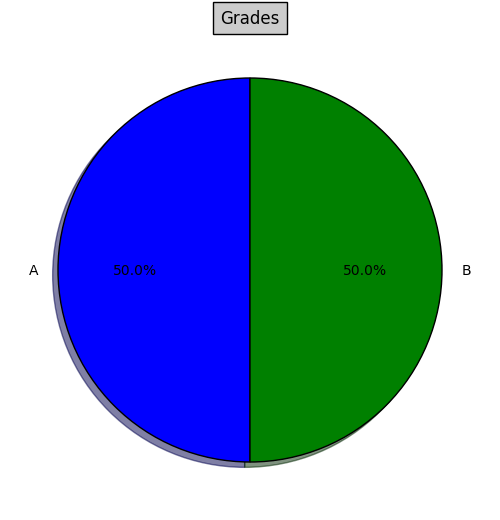


Menu:
     1. Add Student (id and name)
     2. Add Student Grades
     3. Print a list of student names, final scores, and letter grades sorted by names
     4. Print score summary (Student Count, Min, Max, Avg. , StdDev)
     5. Plot a pie chart showing the final letter grades distribution
     6. Exit
Make a selection from the above list: 6

 Goodbye
[('2', ['Ben', [50, 98, 95, 70, 93, 92], [90, 70], 81.799999999999997, 'B']), ('1', ['Kristin', [100, 98, 95, 94, 93, 92], [90, 90], 93.200000000000003, 'A'])]


In [4]:
menu(class_dict)

menu()